In [1]:
cd /home/cougarnet.uh.edu/hqvo2/Projects/Microscopy_Segmentation_Project/segmentation_libs/Semantic-SAM/

/home/cougarnet.uh.edu/hqvo2/Projects/Microscopy_Segmentation_Project/segmentation_libs/Semantic-SAM


/home/cougarnet.uh.edu/hqvo2/miniconda3/envs/semanticsam/lib/python3.9/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
import cv2
import matplotlib.pyplot as plt
import skimage.io as io

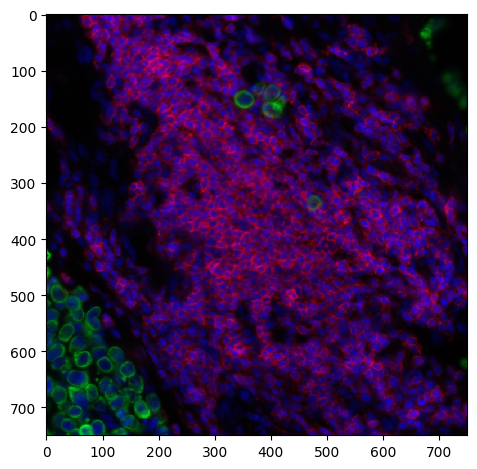

In [3]:
# img_path = '/home/cougarnet.uh.edu/hqvo2/Projects/Microscopy_Segmentation_Project/segmentation_libs/Semantic-SAM/examples/4.png'
img_path = '/data/hqvo2/microscopy/private/GeoMX_ROIs/images/Bone1 Met2 1_ROI:0_tlhw-17198-21399-750-750.png'
img = io.imread(img_path)
io.imshow(img)

/home/cougarnet.uh.edu/hqvo2/miniconda3/envs/semanticsam/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/cougarnet.uh.edu/hqvo2/miniconda3/envs/semanticsam/lib/python3.9/site-packages/torchvision/transforms/transforms.py:329: UserWarning: Argument 'interpolation' of type int is deprecated since 0.13 and will be removed in 0.15. Please use InterpolationMode enum.
  warnings.warn(
/home/cougarnet.uh.edu/hqvo2/miniconda3/envs/semanticsam/lib/python3.9/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
$UNUSED$ criterion.empty_weight, Ckpt Shape: torch.Size([2])


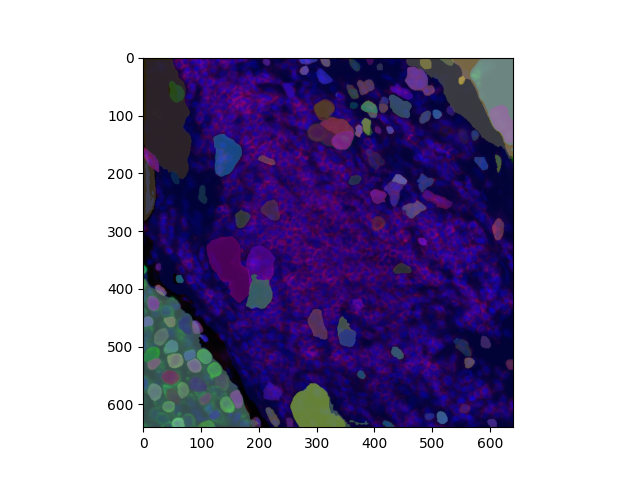

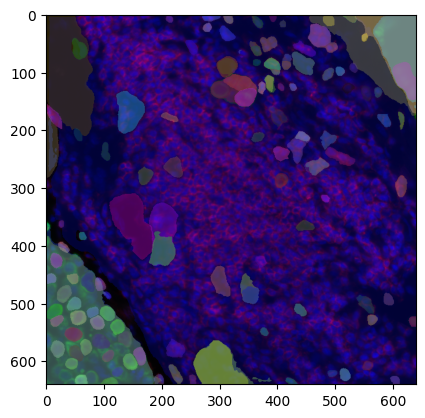

In [4]:
from semantic_sam import prepare_image, plot_results, build_semantic_sam, SemanticSamAutomaticMaskGenerator
original_image, input_image = prepare_image(image_pth=img_path)  # change the image path to your image
mask_generator = SemanticSamAutomaticMaskGenerator(build_semantic_sam(model_type='T', ckpt='/home/cougarnet.uh.edu/hqvo2/Projects/Microscopy_Segmentation_Project/segmentation_libs/Semantic-SAM/ckpts/swint_only_sam_many2many.pth')) # model_type: 'L' / 'T', depends on your checkpint
masks = mask_generator.generate(input_image)
plot_results(masks, original_image, save_path='visualization/')  # results and original images will be saved at save_path